In [6]:
import numpy as np
import pandas as pd
import time
import os

import seaborn as sns
import matplotlib.pyplot as plt

from utils.label_query import query_labels
from utils.result_plotter import plot_ssalad_results
from utils.semi_supervised_trainer import run_experiment


In [8]:
dataset_subset = [x.replace(".npz", "") for x in os.listdir("./data/")]

In [ ]:
# dataset_subset

In [10]:
def check_column_types(arr):
    num_columns = arr.shape[1]
    num_rows = arr.shape[0]
    numerical_index  = []
    category_index = []
    for i in range(num_columns):
        column = arr[:, i]
        unique_vals = np.unique(column)
        #percentage of unique vs all records
        pct_unique = (len(unique_vals)/num_rows)*100
        # chec if the column is one-hot encoded (binary with 2 unique values)
        # print(f"Column {i} (unique values: {pct_unique}  {len(unique_vals)})")
        if len(unique_vals) == 2 and set(unique_vals) == {0, 1}:
            print(f"Column {i} might be one-hot encoded (unique values: {pct_unique}  {len(unique_vals)})")
            category_index.append(i)
        # chekc if the column has a small number of unique values (i.e like 1% of total records)
        # we also assume that we cannot have more than 50 unique categories in a data no matter its size
        elif pct_unique < 1 and len(unique_vals)<50:
            category_index.append(i)
        else:
            numerical_index.append(i)
    return category_index, numerical_index

In [12]:

data_info = {}
for each_data in dataset_subset:
    path = f'data/{each_data}.npz'
    try:
        data = np.load(path, allow_pickle=True)
        X, y = data['X'], data['y']

        cat_index, num_index = check_column_types(X)
        data_info[each_data] = [cat_index, num_index, X.shape[1]]
    except Exception as e:
        print(f"{each_data}: Error {e}")

Column 24 might be one-hot encoded (unique values: 0.03834355828220859  2)
Column 32 might be one-hot encoded (unique values: 0.03834355828220859  2)
Column 56 might be one-hot encoded (unique values: 0.03834355828220859  2)
Column 0 might be one-hot encoded (unique values: 0.000987171703710285  2)
Column 1 might be one-hot encoded (unique values: 0.000987171703710285  2)
Column 2 might be one-hot encoded (unique values: 0.000987171703710285  2)
Column 3 might be one-hot encoded (unique values: 0.000987171703710285  2)
Column 4 might be one-hot encoded (unique values: 0.000987171703710285  2)
Column 5 might be one-hot encoded (unique values: 0.000987171703710285  2)
Column 6 might be one-hot encoded (unique values: 0.000987171703710285  2)
Column 7 might be one-hot encoded (unique values: 0.000987171703710285  2)
Column 8 might be one-hot encoded (unique values: 0.000987171703710285  2)
Column 9 might be one-hot encoded (unique values: 0.000987171703710285  2)
Column 10 might be one-ho

In [13]:
path = f'data/17_InternetAds.npz'
data = np.load(path, allow_pickle=True)
X, y = data['X'], data['y']
cat_index, num_index = check_column_types(X)

Column 0 might be one-hot encoded (unique values: 0.10172939979654119  2)
Column 1 might be one-hot encoded (unique values: 0.10172939979654119  2)
Column 2 might be one-hot encoded (unique values: 0.10172939979654119  2)
Column 3 might be one-hot encoded (unique values: 0.10172939979654119  2)
Column 4 might be one-hot encoded (unique values: 0.10172939979654119  2)
Column 5 might be one-hot encoded (unique values: 0.10172939979654119  2)
Column 6 might be one-hot encoded (unique values: 0.10172939979654119  2)
Column 7 might be one-hot encoded (unique values: 0.10172939979654119  2)
Column 8 might be one-hot encoded (unique values: 0.10172939979654119  2)
Column 9 might be one-hot encoded (unique values: 0.10172939979654119  2)
Column 10 might be one-hot encoded (unique values: 0.10172939979654119  2)
Column 11 might be one-hot encoded (unique values: 0.10172939979654119  2)
Column 12 might be one-hot encoded (unique values: 0.10172939979654119  2)
Column 13 might be one-hot encoded 

In [16]:
len(cat_index), len(num_index)

(1555, 0)

In [18]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1962,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1963,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:

final_infor = {
   k: [len(v[0]), len(v[1]), v[2]] for k,v in data_info.items()
}

In [22]:
information = pd.DataFrame(final_infor).T
information.columns = ["num_categorial", "num_numerical", "num_columns"]
information

,num_categorial,num_numerical,num_columns
26_optdigits,64,0,64
42_WBC,0,9,9
21_Lymphography,0,18,18
8_celeba,39,0,39
33_skin,0,3,3
34_smtp,0,3,3
28_pendigits,0,16,16
39_vertebral,0,6,6
11_donors,7,3,10
43_WDBC,0,30,30


In [25]:
"""
label_prop_time = Time take to do label propagation. It does not include training the detection models.
time = time taken to train  and infer from either supervised (xgboost where we checking what eefect does increasing estimators has) and nsupervised (iforest)
"""

'\nlabel_prop_time = Time take to do label propagation. It does not include training the detection models.\ntime = time taken to train  and infer from either supervised (xgboost where we checking what eefect does increasing estimators has) and nsupervised (iforest)\n'

In [27]:
final_results = pd.read_csv("parameter_testing_results.csv")

In [29]:
final_results["n_neighbors"].unique()

array([ 5, 10, 15, 20, 25, 30, 35, 40])

In [31]:
final_results["dataset"].unique()

array(['11_donors', '33_skin', '26_optdigits', '45_wine', '12_fault',
       '30_satellite', '37_Stamps'], dtype=object)

In [33]:
# final_results

In [36]:
# get a dictionary to use
metadata_series = pd.Series(final_infor).to_dict()
final_results[['num_categorial', 'num_numerical', 'num_columns']] = final_results['dataset'].map(metadata_series).apply(pd.Series)

In [37]:
final_results.columns

Index(['dataset', 'num_samples', 'model', 'fraction', 'rep', 'query_strategy',
       'propagation', 'kernel', 'num_labels', 'label_prop_time', 'estimators',
       'n_neighbors', 'roc_auc', 'time', 'num_categorial', 'num_numerical',
       'num_columns'],
      dtype='object')

In [38]:
df = final_results.copy()

In [42]:
df.head()

,dataset,num_samples,model,fraction,rep,query_strategy,propagation,kernel,num_labels,label_prop_time,estimators,n_neighbors,roc_auc,time,num_categorial,num_numerical,num_columns
0,11_donors,2001,IForest,0.0,0,clusters,True,knn,0,0.0,20,5,0.791817,0.252198,7,3,10
1,11_donors,2001,IForest,0.0,1,clusters,True,knn,0,0.0,20,5,0.776780,0.247518,7,3,10
2,11_donors,2001,IForest,0.0,2,clusters,True,knn,0,0.0,20,5,0.743146,0.240418,7,3,10
3,11_donors,2001,IForest,0.0,0,uncertainty,True,knn,0,0.0,20,5,0.793181,0.240677,7,3,10
4,11_donors,2001,IForest,0.0,1,uncertainty,True,knn,0,0.0,20,5,0.749274,0.241341,7,3,10


In [44]:
xgb = final_results[(final_results.model == "XGB")].reset_index(drop=True)
iforest = final_results[(final_results.model != "XGB")].reset_index(drop=True)

In [46]:
iforest.head()

,dataset,num_samples,model,fraction,rep,query_strategy,propagation,kernel,num_labels,label_prop_time,estimators,n_neighbors,roc_auc,time,num_categorial,num_numerical,num_columns
0,11_donors,2001,IForest,0.0,0,clusters,True,knn,0,0.0,20,5,0.791817,0.252198,7,3,10
1,11_donors,2001,IForest,0.0,1,clusters,True,knn,0,0.0,20,5,0.776780,0.247518,7,3,10
2,11_donors,2001,IForest,0.0,2,clusters,True,knn,0,0.0,20,5,0.743146,0.240418,7,3,10
3,11_donors,2001,IForest,0.0,0,uncertainty,True,knn,0,0.0,20,5,0.793181,0.240677,7,3,10
4,11_donors,2001,IForest,0.0,1,uncertainty,True,knn,0,0.0,20,5,0.749274,0.241341,7,3,10


In [48]:
# #drop model columns, and kernel, propagation, rep
iforest = iforest.drop(columns=["model", "rep", "propagation", "kernel"])
xgb = xgb.drop(columns=[ "model", "rep", "propagation", "kernel"])

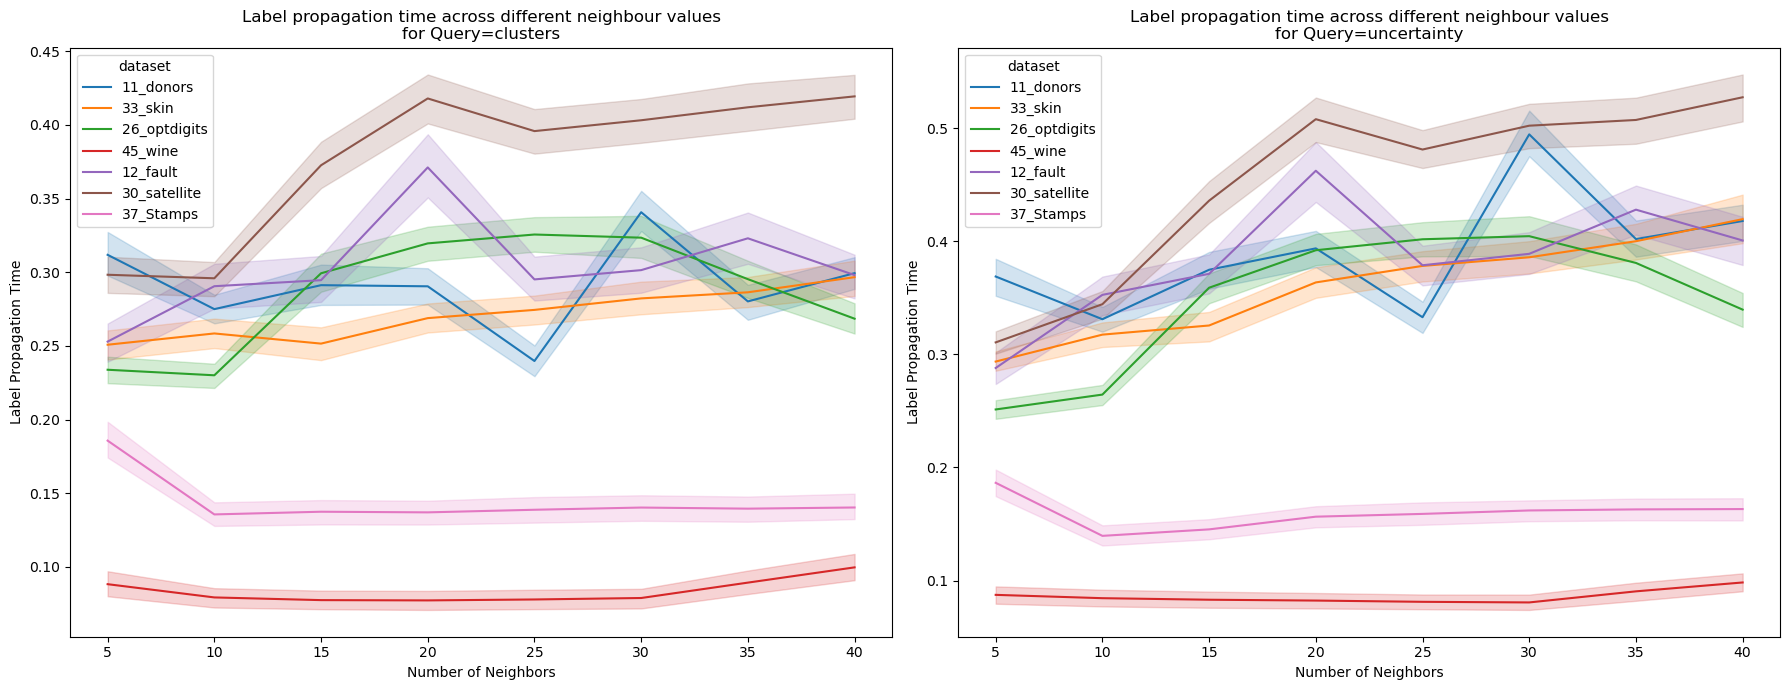

In [50]:
queries = iforest.query_strategy.unique()
fig, axes = plt.subplots(1, len(queries), figsize=(18, 7))
for i, each_query in enumerate(queries):
    each_iforest_data = iforest[iforest.query_strategy == each_query].reset_index(drop=True)
    sns.lineplot(
        x="n_neighbors",
        y="label_prop_time",
        data=each_iforest_data,
        hue="dataset",
        ax=axes[i]  
    )
    axes[i].set_title(f"Label propagation time across different neighbour values\nfor Query={each_query}")
    axes[i].set_xlabel("Number of Neighbors")
    axes[i].set_ylabel("Label Propagation Time")
plt.tight_layout()
plt.show()

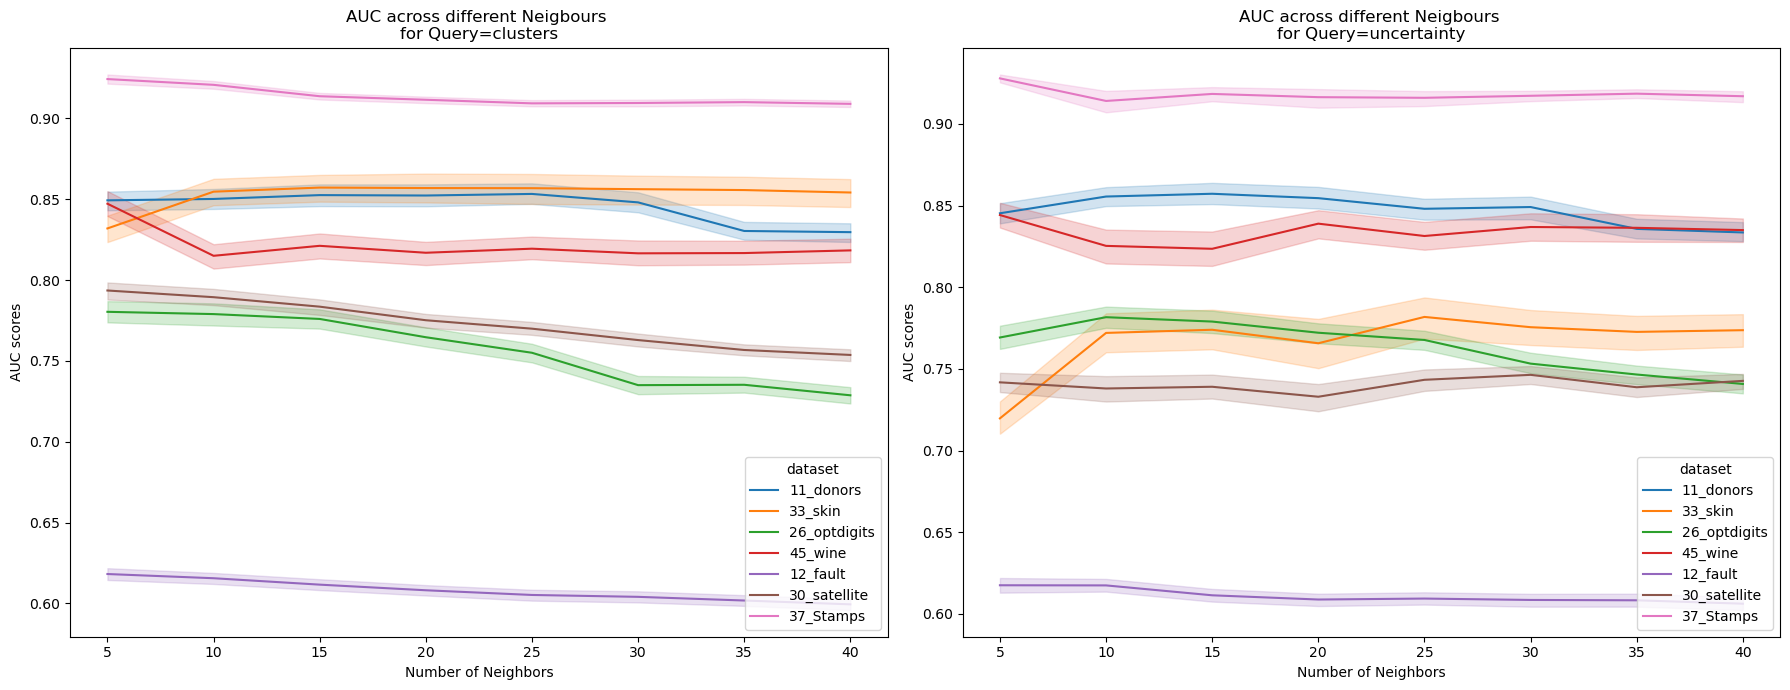

In [51]:
queries = iforest.query_strategy.unique()
fig, axes = plt.subplots(1, len(queries), figsize=(18, 7))
for i, each_query in enumerate(queries):
    each_iforest_data = iforest[iforest.query_strategy == each_query].reset_index(drop=True)
    sns.lineplot(
        x ="n_neighbors",
        y ="roc_auc",
        data= each_iforest_data,
        hue = "dataset",
        ax=axes[i]
    )
    axes[i].set_title(f"AUC across different Neigbours \nfor Query={each_query}")
    axes[i].set_xlabel("Number of Neighbors")
    axes[i].set_ylabel("AUC scores")
plt.tight_layout()
plt.show()

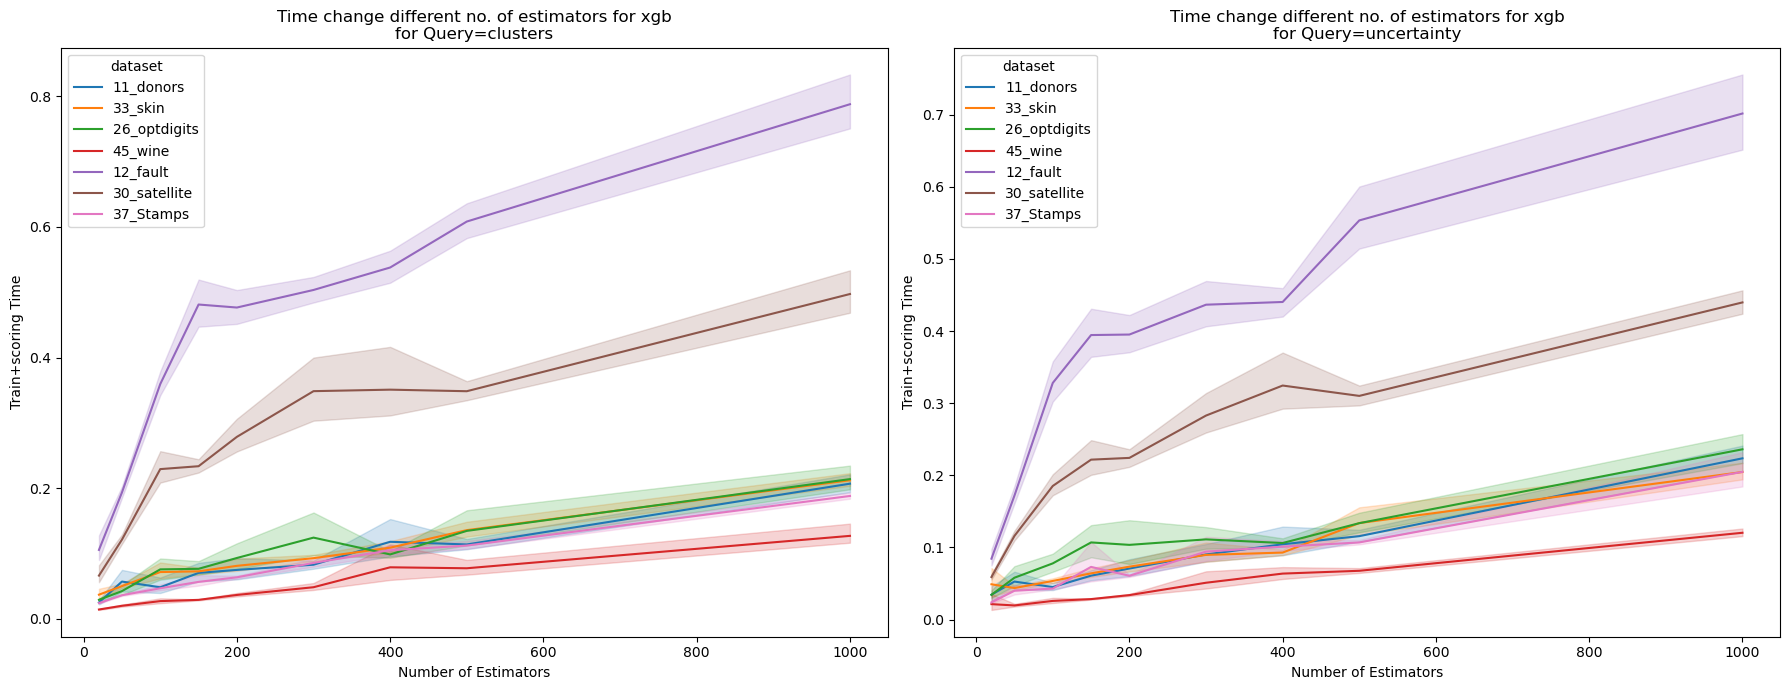

In [54]:
# for the case of gboost

queries = iforest.query_strategy.unique()
fig, axes = plt.subplots(1, len(queries), figsize=(18, 7))
for i, each_query in enumerate(queries):
    each_xgb_data = xgb[xgb.query_strategy == each_query].reset_index(drop=True)
    sns.lineplot(
        x="estimators",
        y="time",
        data=each_xgb_data,
        hue="dataset",
        ax=axes[i]  
    )
    axes[i].set_title(f"Time change different no. of estimators for xgb\nfor Query={each_query}")
    axes[i].set_xlabel("Number of Estimators")
    axes[i].set_ylabel("Train+scoring Time")
plt.tight_layout()
plt.show()



Text(0.5, 1.0, 'AUC across different no. of estimators for xgb for Clustering')

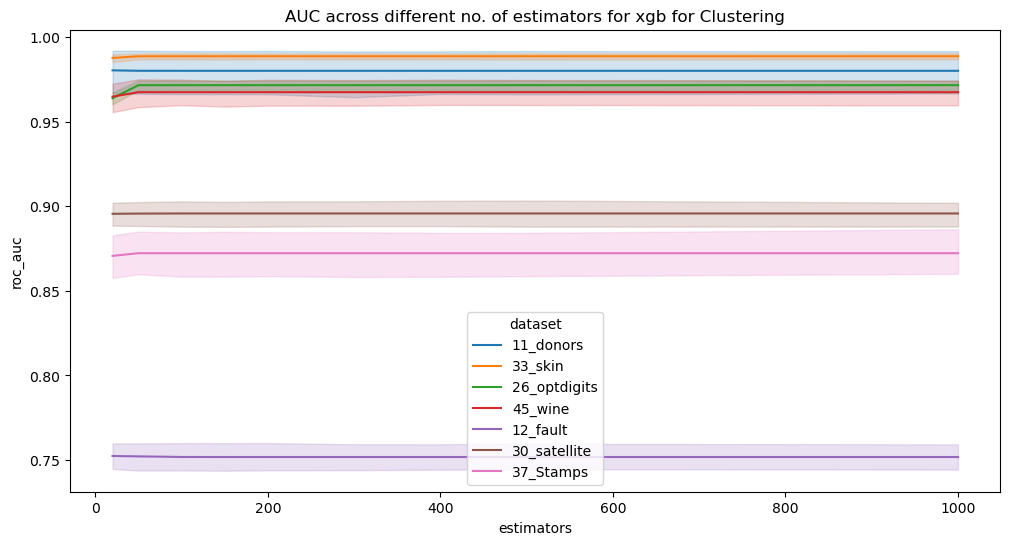

In [58]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    x ="estimators",
    y ="roc_auc",
    data= xgb[xgb.query_strategy=="clusters"],
    hue = "dataset",
)

plt.title("AUC across different no. of estimators for xgb for Clustering")




### Effect of Sample Size on AUC/Time

In [61]:
sample_size_data =  pd.read_csv("test_by_size.csv")

In [64]:
sample_size_data.shape

(17757, 14)

In [66]:
# add some additional information
sample_size_data[['num_categorial', 'num_numerical', 'num_columns']] = sample_size_data['dataset'].map(metadata_series).apply(pd.Series)

In [67]:
# filter only iforest data
iforest_size_data = sample_size_data[sample_size_data["model"] !="XGB"].reset_index(drop=True)

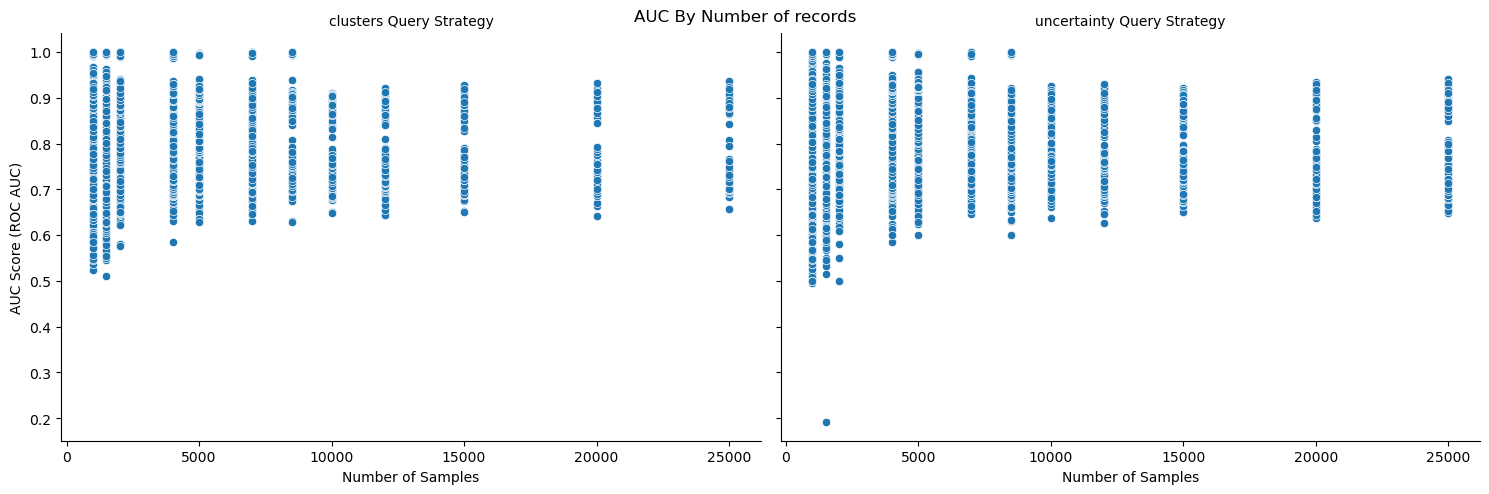

In [68]:
g = sns.FacetGrid(iforest_size_data, col='query_strategy', height=5, aspect=1.5)
g.map(sns.scatterplot, 'num_samples', 'roc_auc')
g.set_axis_labels("Number of Samples", "AUC Score (ROC AUC)")
g.set_titles("{col_name} Query Strategy")
plt.suptitle("AUC By Number of records")
plt.show()


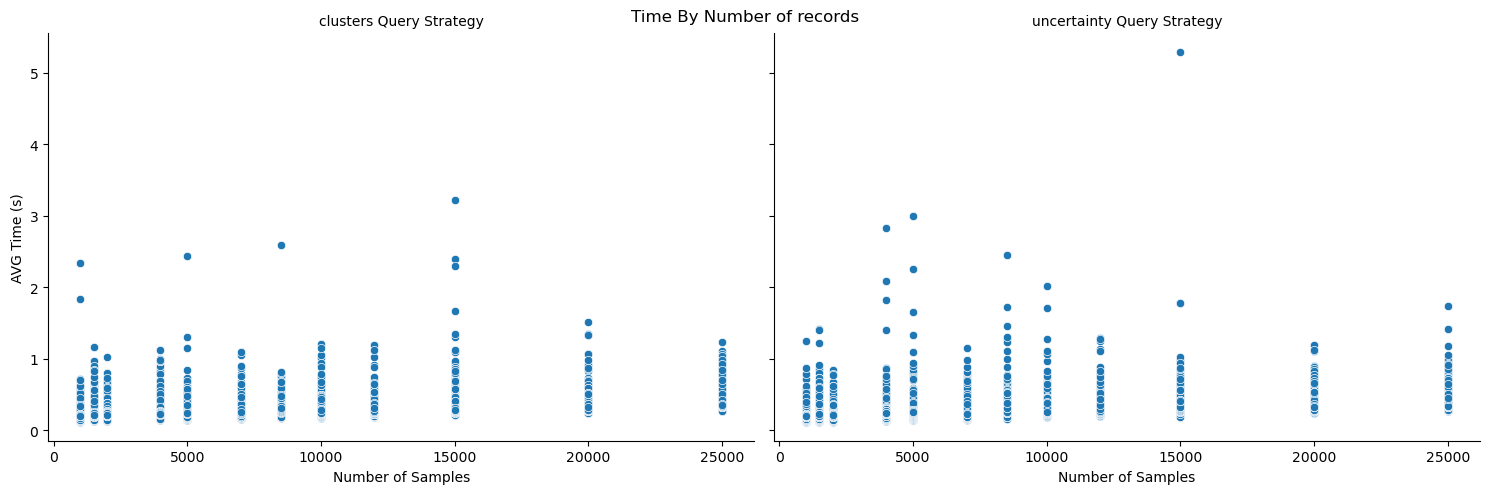

In [69]:
g = sns.FacetGrid(iforest_size_data, col='query_strategy', height=5, aspect=1.5)
g.map(sns.scatterplot, 'num_samples', 'time')
g.set_axis_labels("Number of Samples", "AVG Time (s)")
g.set_titles("{col_name} Query Strategy")
plt.suptitle("Time By Number of records")
plt.show()


In [72]:
iforest_size_data["num_samples"].value_counts()

num_samples
1500     1560
1000     1352
5000     1144
2000     1040
4000      936
7000      728
8500      520
10000     416
12000     416
15000     416
20000     312
25000     312
1001      208
2001      208
4001      208
Name: count, dtype: int64

In [74]:
iforest_size_data.groupby(["dataset"])[["dataset", "num_samples"]].max()


,dataset,num_samples
dataset,,
11_donors,11_donors,25000
12_fault,12_fault,1500
20_letter,20_letter,1500
22_magic.gamma,22_magic.gamma,15000
24_mnist,24_mnist,5000
26_optdigits,26_optdigits,5000
27_PageBlocks,27_PageBlocks,5000
2_annthyroid,2_annthyroid,7000
30_satellite,30_satellite,5000


In [78]:
# filtering only those with oupto 15k records
filtered_iforest = iforest_size_data[iforest_size_data.dataset.isin(["33_skin", "5_campaign", "11_donors"])]

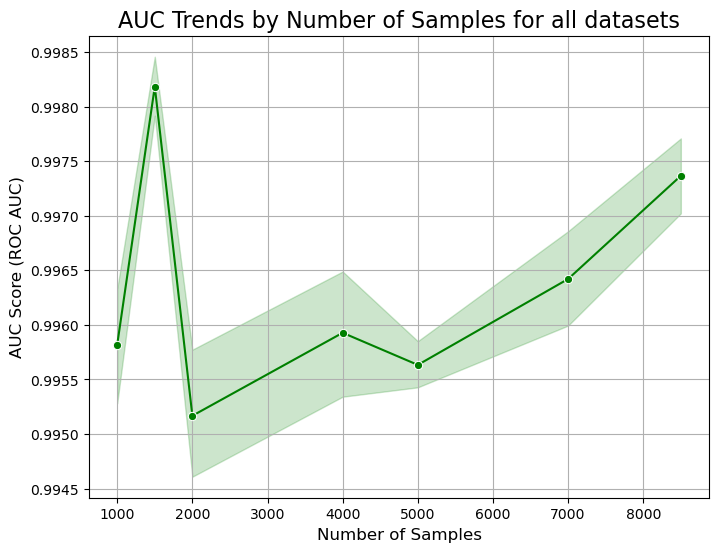

In [80]:
# average UAC 
plt.figure(figsize=(8, 6))
sns.lineplot(data=iforest_size_data[iforest_size_data.dataset.isin(["32_shuttle"])], x='num_samples', y='roc_auc', marker='o', color='green')
plt.title("AUC Trends by Number of Samples for all datasets", fontsize=16)
plt.xlabel("Number of Samples", fontsize=12)
plt.ylabel("AUC Score (ROC AUC)", fontsize=12)
plt.grid(True)
plt.show()


In [82]:
# iforest_size_data = filtered_iforest.copy()

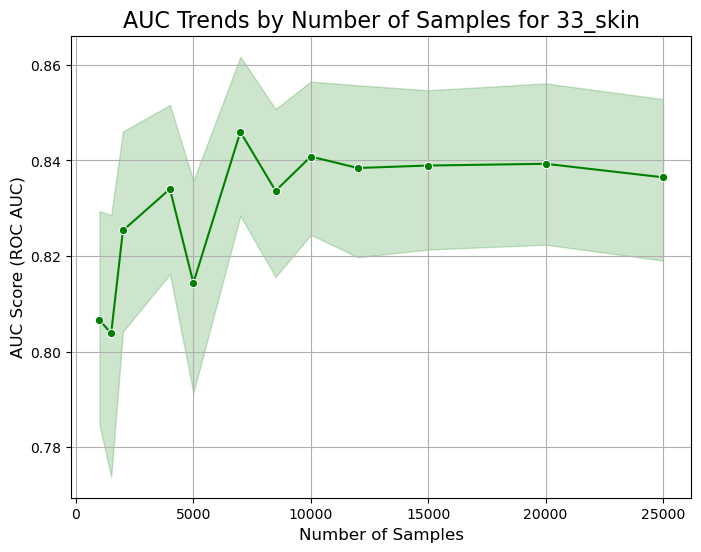

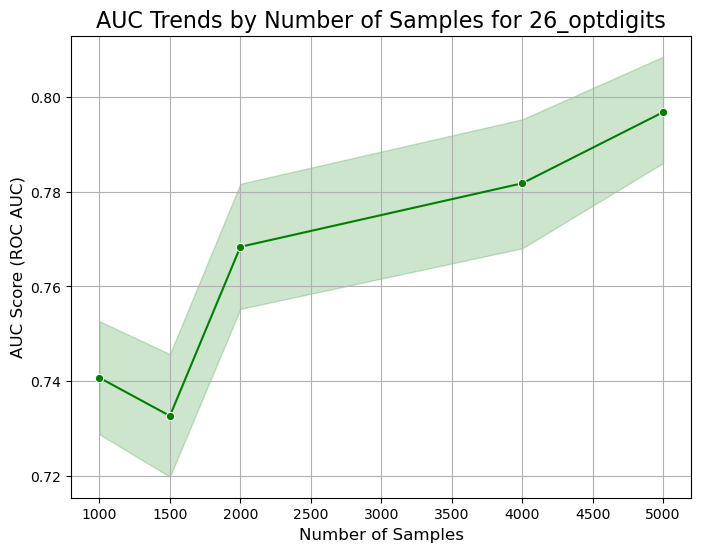

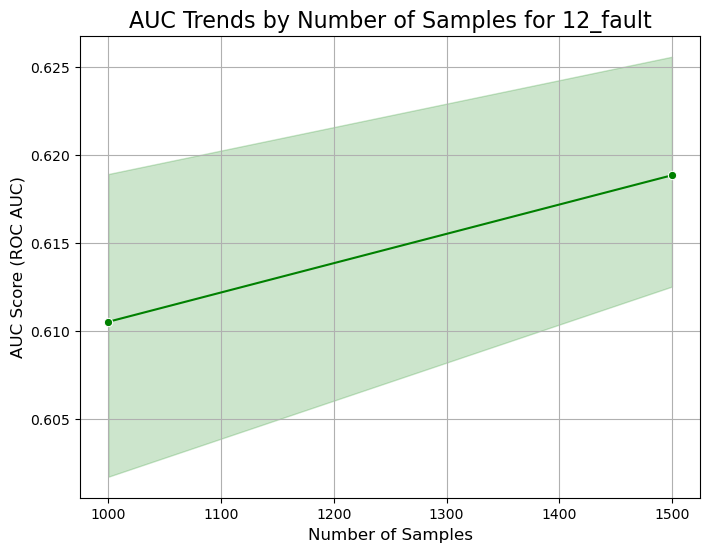

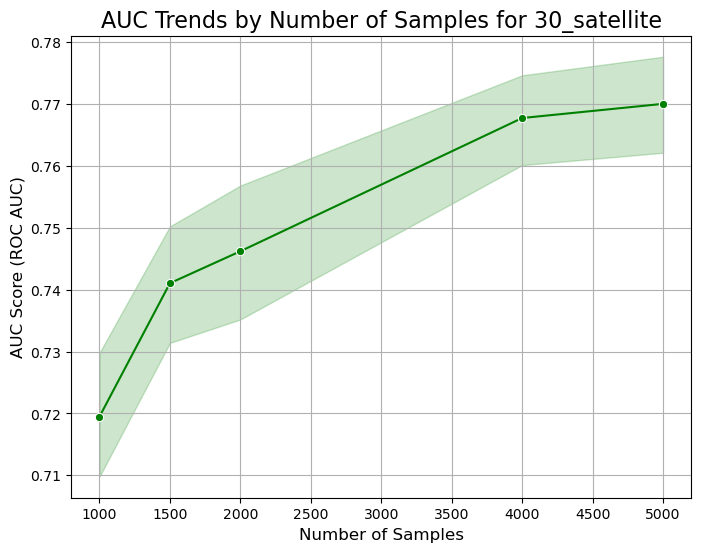

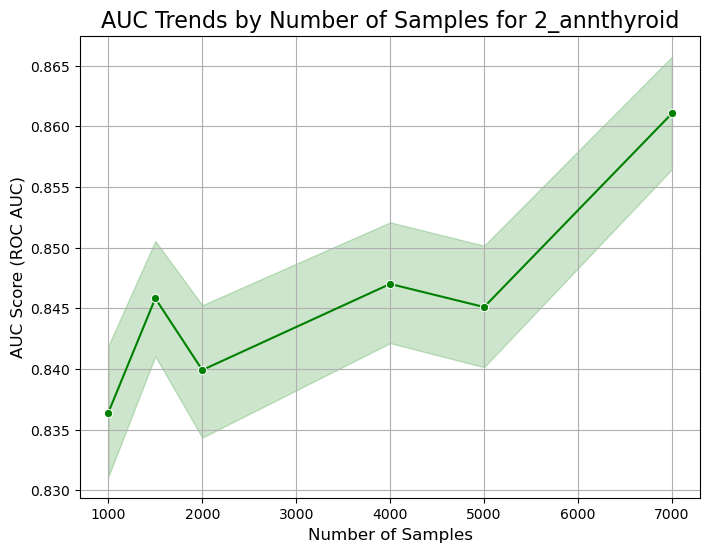

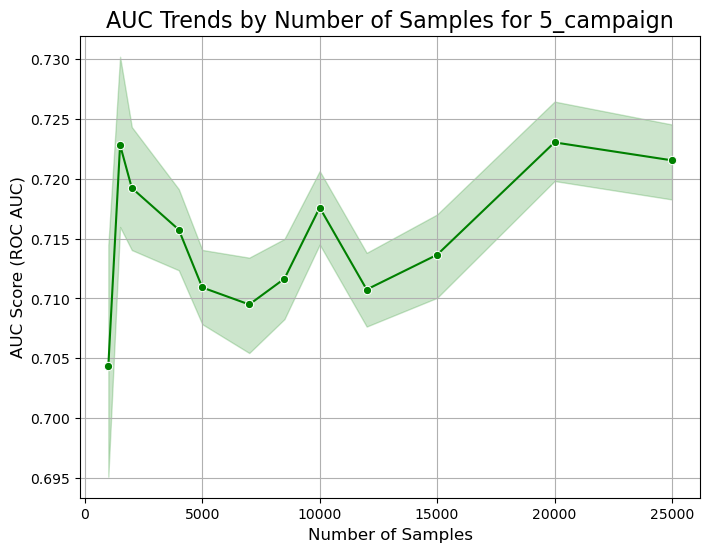

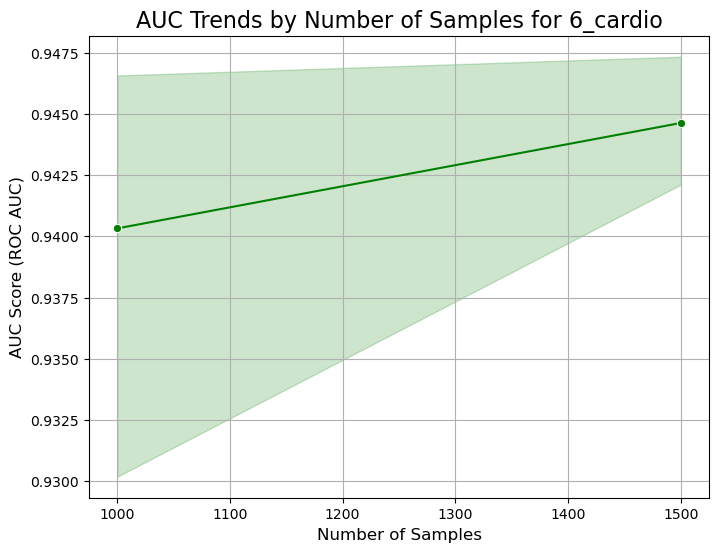

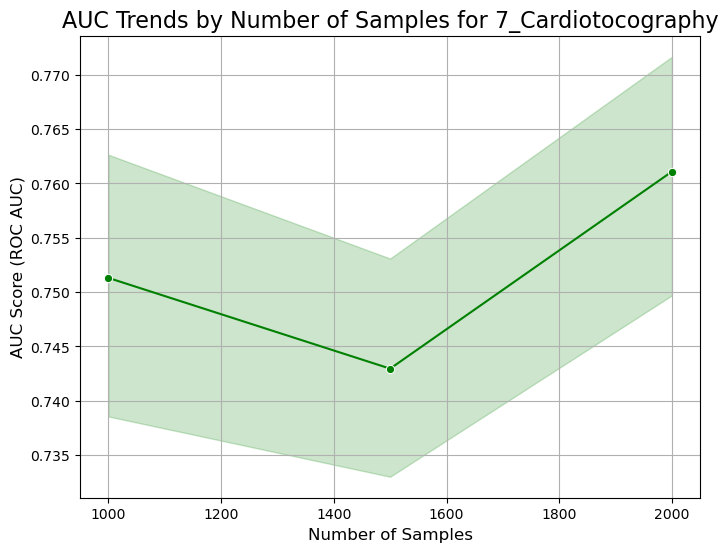

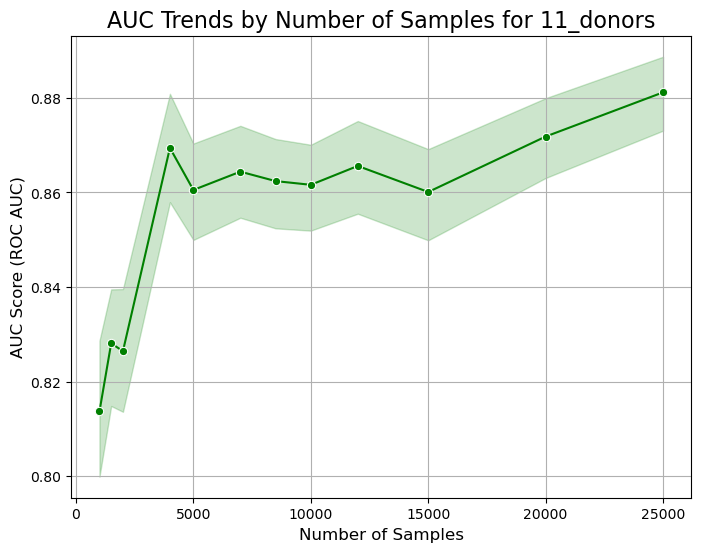

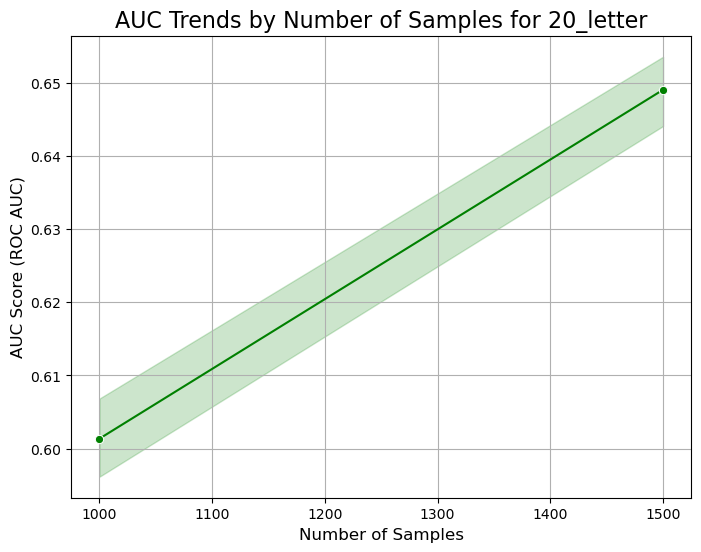

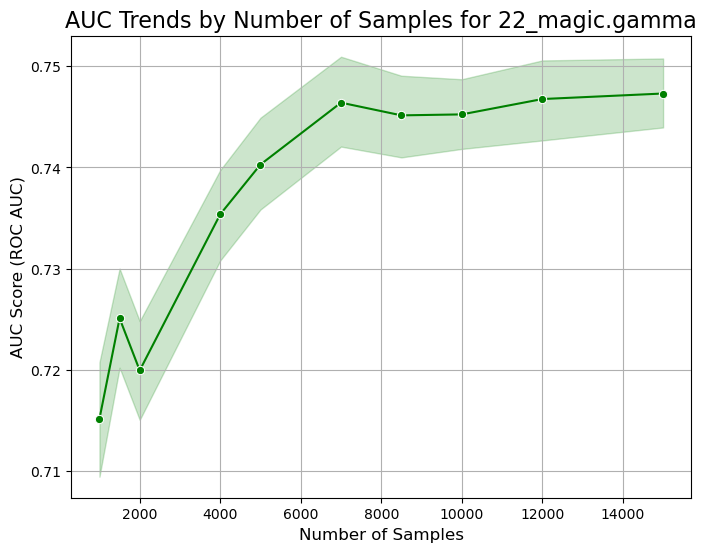

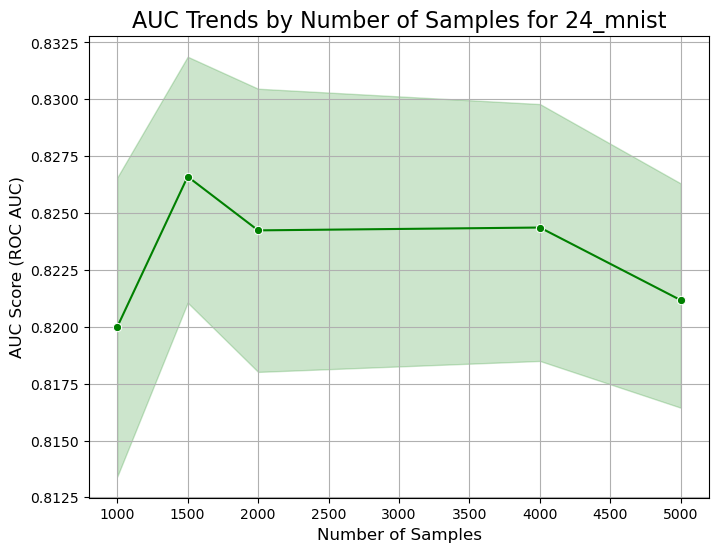

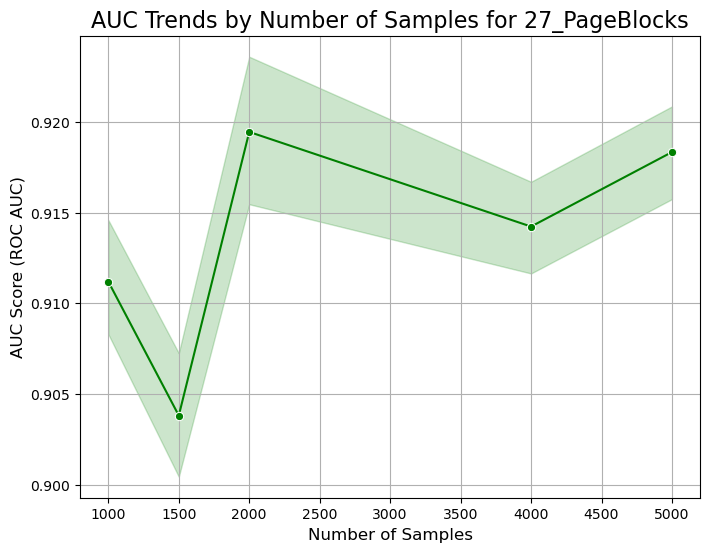

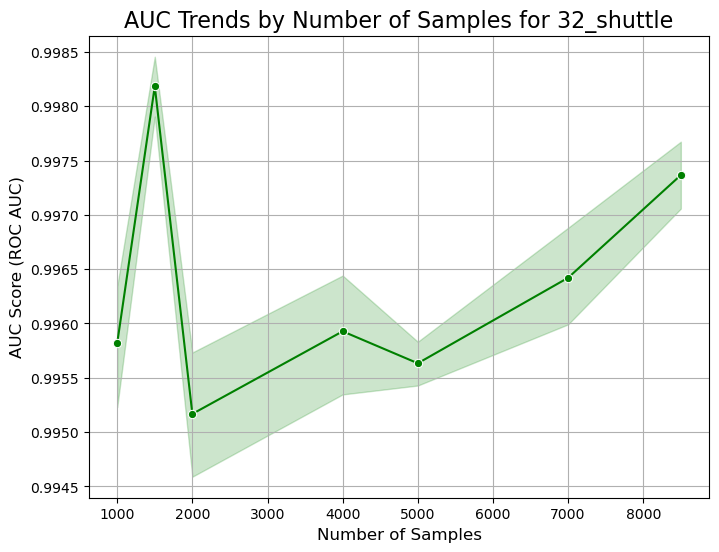

In [84]:
for each_dataset in iforest_size_data["dataset"].unique():
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=iforest_size_data[iforest_size_data.dataset == each_dataset], x='num_samples', y='roc_auc', marker='o', color='green')
    plt.title(f"AUC Trends by Number of Samples for {each_dataset}", fontsize=16)
    plt.xlabel("Number of Samples", fontsize=12)
    plt.ylabel("AUC Score (ROC AUC)", fontsize=12)
    plt.grid(True)
    plt.show()


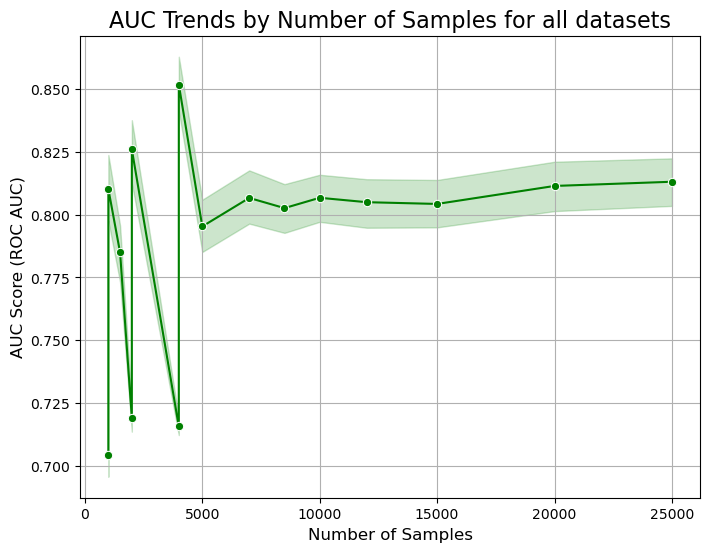

In [85]:
# average UAC 
plt.figure(figsize=(8, 6))
sns.lineplot(data=filtered_iforest, x='num_samples', y='roc_auc', marker='o', color='green')
plt.title("AUC Trends by Number of Samples for all datasets", fontsize=16)
plt.xlabel("Number of Samples", fontsize=12)
plt.ylabel("AUC Score (ROC AUC)", fontsize=12)
plt.grid(True)
plt.show()


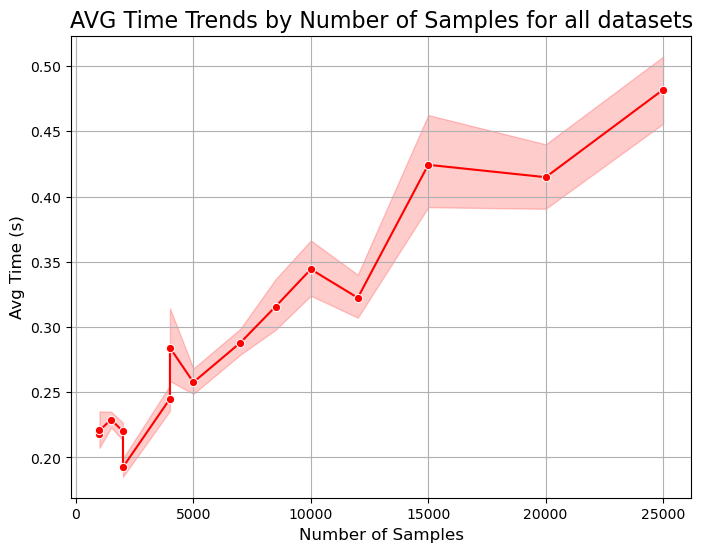

In [92]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=iforest_size_data, x='num_samples', y='time', marker='o', color='red')
plt.title("AVG Time Trends by Number of Samples for all datasets", fontsize=16)
plt.xlabel("Number of Samples", fontsize=12)
plt.ylabel("Avg Time (s)", fontsize=12)
plt.grid(True)
plt.show()


In [93]:
iforest_size_data.head()

,dataset,num_samples,model,fraction,rep,query_strategy,propagation,kernel,num_labels,label_prop_time,estimators,n_neighbors,roc_auc,time,num_categorial,num_numerical,num_columns
0,33_skin,1001,IForest,0.0,43,clusters,True,knn,0,0.0,100,20,0.667700,0.134338,0,3,3
1,33_skin,1001,IForest,0.0,24,clusters,True,knn,0,0.0,100,20,0.605406,0.139993,0,3,3
2,33_skin,1001,IForest,0.0,100,clusters,True,knn,0,0.0,100,20,0.691944,0.137676,0,3,3
3,33_skin,1001,IForest,0.0,2024,clusters,True,knn,0,0.0,100,20,0.670558,0.150766,0,3,3
4,33_skin,1001,IForest,0.0,43,uncertainty,True,knn,0,0.0,100,20,0.660579,0.143149,0,3,3


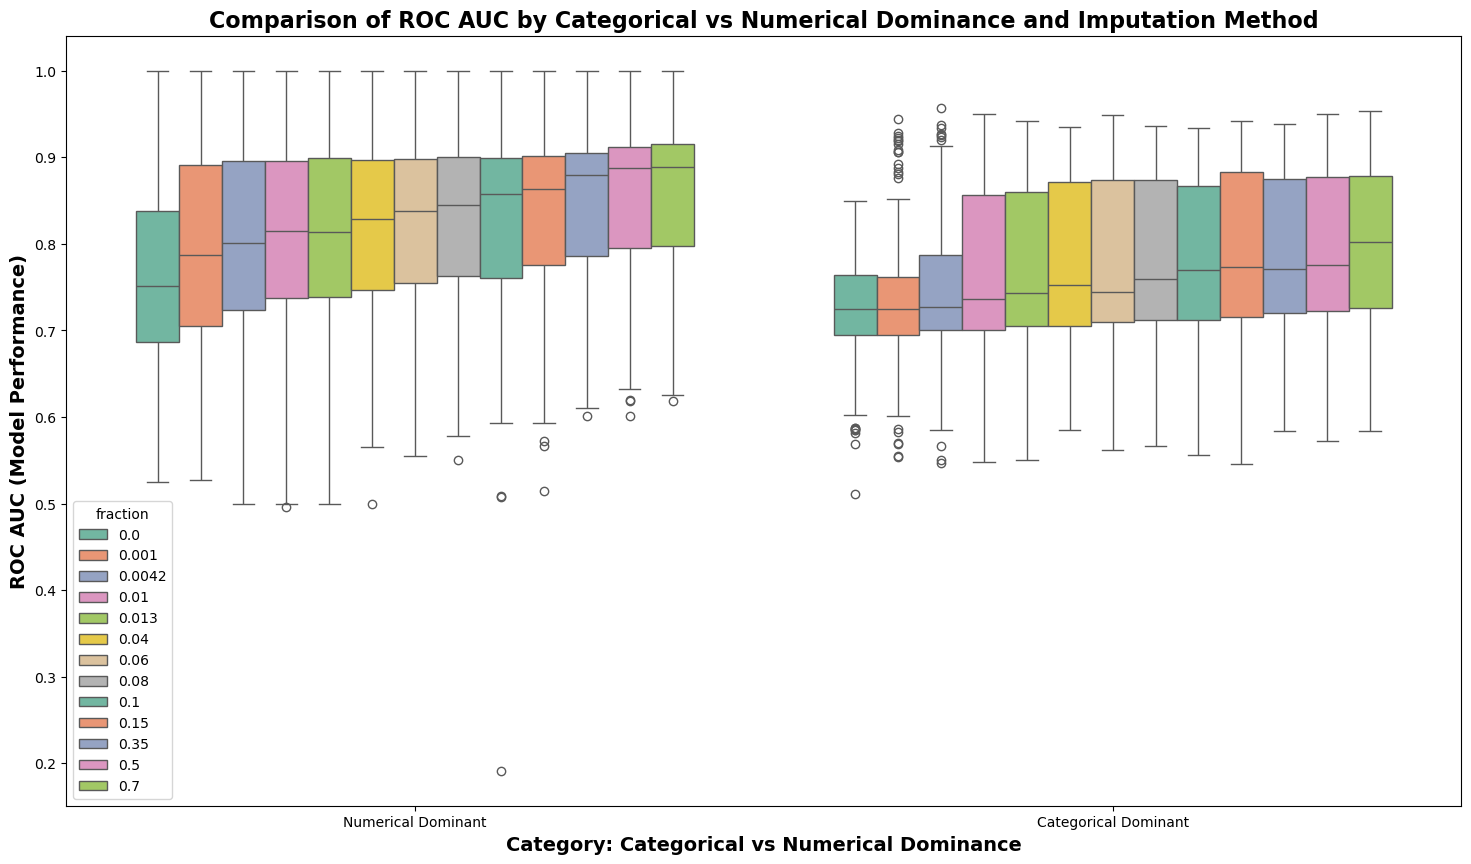

In [96]:
# plot cat vs num columns
iforest_size_data['num_cat_ratio_category'] = np.where(
    iforest_size_data['num_categorial'] >= iforest_size_data['num_numerical'], 
    'Categorical Dominant', 
    'Numerical Dominant')

plt.figure(figsize=(18, 10))
sns.boxplot(data=iforest_size_data, 
            x='num_cat_ratio_category', 
            y='roc_auc', 
            hue='fraction', 
            palette='Set2') 
plt.title('Comparison of ROC AUC by Categorical vs Numerical Dominance and Imputation Method', 
          fontweight="bold", 
          fontsize=16)

plt.xlabel('Category: Categorical vs Numerical Dominance', 
           fontweight="bold", 
           fontsize=14)

plt.ylabel('ROC AUC (Model Performance)', 
           fontweight="bold", 
           fontsize=14)
plt.show()


In [97]:
iforest_size_data.groupby(["num_cat_ratio_category", "fraction"])[["time", "roc_auc"]].mean()

time   roc_auc
num_cat_ratio_category fraction                    
Categorical Dominant   0.0000    0.289350  0.722731
                       0.0010    0.296950  0.730413
                       0.0042    0.288525  0.749013
                       0.0100    0.298214  0.767364
                       0.0130    0.291808  0.767779
                       0.0400    0.306803  0.777995
                       0.0600    0.331703  0.779631
                       0.0800    0.297673  0.784484
                       0.1000    0.293177  0.782012
                       0.1500    0.307317  0.788242
                       0.3500    0.300218  0.790071
                       0.5000    0.292063  0.793394
                       0.7000    0.297186  0.796535
Numerical Dominant     0.0000    0.272054  0.776401
                       0.0010    0.262362  0.791700
                       0.0042    0.255994  0.804064
                       0.0100    0.253013  0.816774
                       0.0130    0.257513  0.817759
                       0.0400    0.269537  0.824903
                       0.0600    0.264738  0.834567
                       0.0800    0.245349  0.837883
                       0.1000    0.258269  0.839888
                       0.1500    0.264660  0.848592
                       0.3500    0.239094  0.858356
                       0.5000    0.256955  0.863951
                       0.7000    0.257466  0.866331

In [100]:
iforest_size_data.dataset.unique()

array(['33_skin', '26_optdigits', '12_fault', '30_satellite',
       '2_annthyroid', '5_campaign', '6_cardio', '7_Cardiotocography',
       '11_donors', '20_letter', '22_magic.gamma', '24_mnist',
       '27_PageBlocks', '32_shuttle'], dtype=object)

In [102]:
iforest_size_data.fraction.unique()

array([0.    , 0.0042, 0.001 , 0.01  , 0.013 , 0.04  , 0.06  , 0.08  ,
       0.1   , 0.15  , 0.35  , 0.5   , 0.7   ])

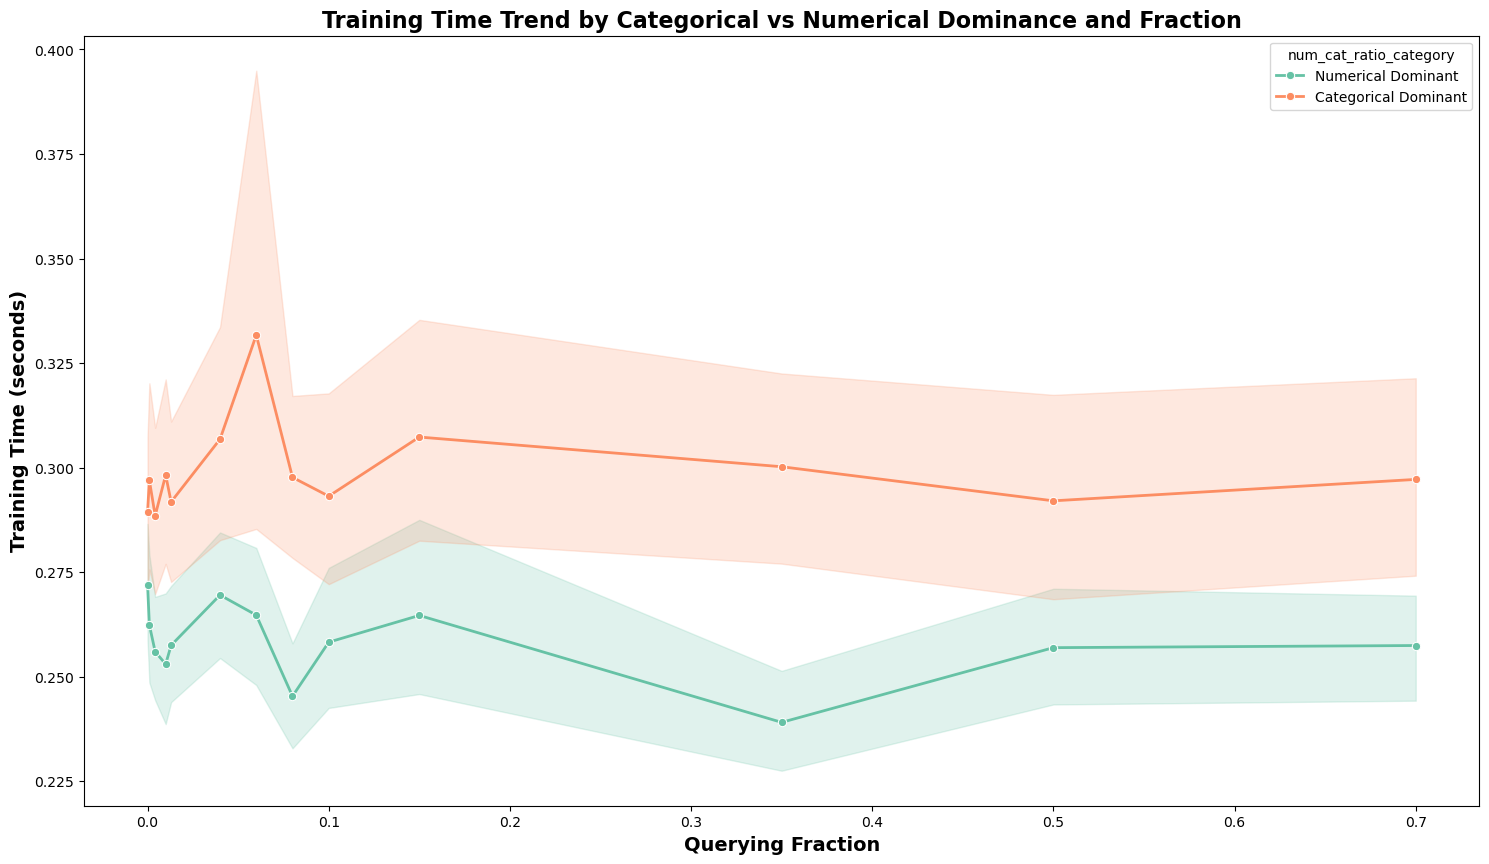

In [104]:
plt.figure(figsize=(18, 10))
# plt training time vs fraction for both categories with lines
sns.lineplot(data=iforest_size_data, 
             x='fraction', 
             y='time', 
             hue='num_cat_ratio_category', 
             palette='Set2', 
             marker='o', 
             linewidth=2)

plt.title('Training Time Trend by Categorical vs Numerical Dominance and Fraction', 
          fontweight="bold", fontsize=16)
plt.xlabel('Querying Fraction', fontweight="bold", fontsize=14)
plt.ylabel('Training Time (seconds)', fontweight="bold", fontsize=14)
plt.show()


In [106]:
iforest_size_data.columns

Index(['dataset', 'num_samples', 'model', 'fraction', 'rep', 'query_strategy',
       'propagation', 'kernel', 'num_labels', 'label_prop_time', 'estimators',
       'n_neighbors', 'roc_auc', 'time', 'num_categorial', 'num_numerical',
       'num_columns', 'num_cat_ratio_category'],
      dtype='object')

In [109]:
iforest_size_data[iforest_size_data.num_samples == 1001]

,dataset,num_samples,model,fraction,rep,query_strategy,propagation,kernel,num_labels,label_prop_time,estimators,n_neighbors,roc_auc,time,num_categorial,num_numerical,num_columns,num_cat_ratio_category
0,33_skin,1001,IForest,0.0,43,clusters,True,knn,0,0.000000,100,20,0.667700,0.134338,0,3,3,Numerical Dominant
1,33_skin,1001,IForest,0.0,24,clusters,True,knn,0,0.000000,100,20,0.605406,0.139993,0,3,3,Numerical Dominant
2,33_skin,1001,IForest,0.0,100,clusters,True,knn,0,0.000000,100,20,0.691944,0.137676,0,3,3,Numerical Dominant
3,33_skin,1001,IForest,0.0,2024,clusters,True,knn,0,0.000000,100,20,0.670558,0.150766,0,3,3,Numerical Dominant
4,33_skin,1001,IForest,0.0,43,uncertainty,True,knn,0,0.000000,100,20,0.660579,0.143149,0,3,3,Numerical Dominant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5611,11_donors,1001,IForest,0.7,2024,clusters,True,knn,350,0.540966,100,20,0.864473,0.222869,7,3,10,Categorical Dominant
5612,11_donors,1001,IForest,0.7,43,uncertainty,True,knn,350,0.345818,100,20,0.877565,0.211638,7,3,10,Categorical Dominant
5613,11_donors,1001,IForest,0.7,24,uncertainty,True,knn,350,0.336024,100,20,0.875442,0.215529,7,3,10,Categorical Dominant
5614,11_donors,1001,IForest,0.7,100,uncertainty,True,knn,350,0.339129,100,20,0.951663,0.222001,7,3,10,Categorical Dominant


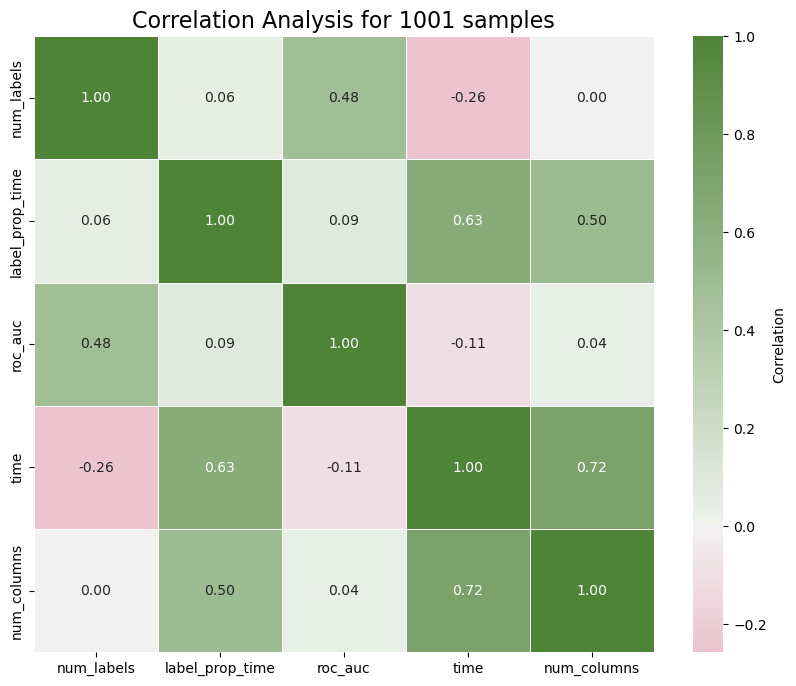

In [111]:
from matplotlib.colors import LinearSegmentedColormap

corr_matrix = iforest_size_data[iforest_size_data.num_samples == 1001][
    ['num_labels','label_prop_time', 'roc_auc','time', 'num_columns']
].corr()
#
# cmap = sns.diverging_palette(240, 120, as_cmap=True)
# white zt 0
# cmap = LinearSegmentedColormap.from_list("CMAP_COLOR", ["red", "white","green"], N=250)

#120=green, red=0
cmap = sns.diverging_palette(0, 120, as_cmap=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt='.2f', linewidths=0.5, center=0, cbar_kws={'label': 'Correlation'})
plt.title(f"Correlation Analysis for {1001} samples", fontsize=16)
plt.show()


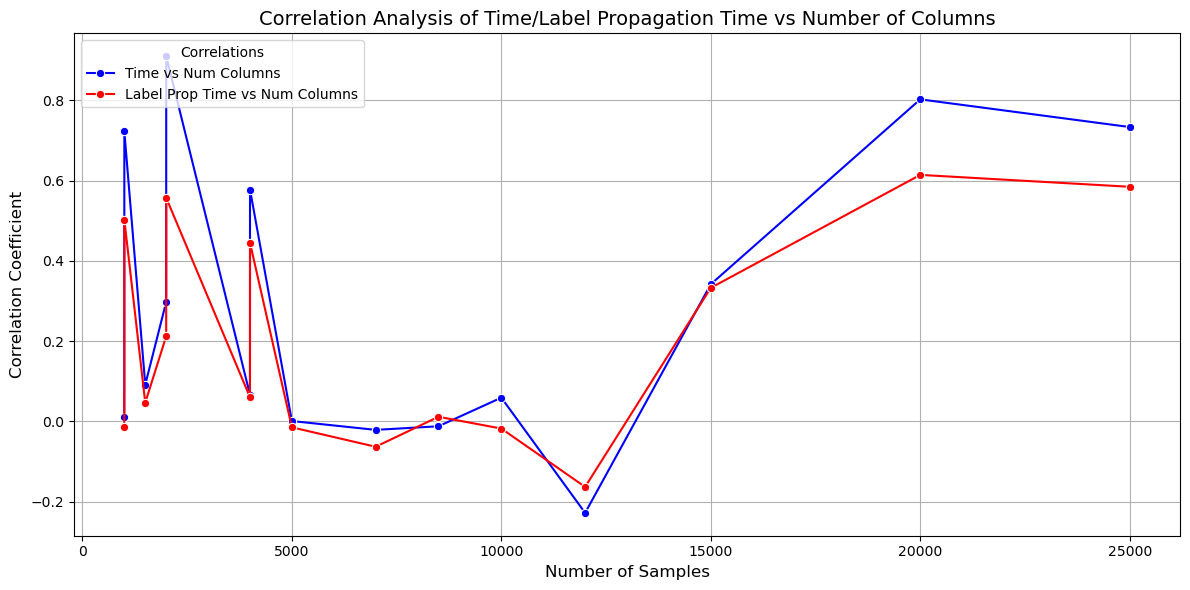

In [114]:
# get collections for time vs  number of samples
corr_time_num_columns = []
corr_label_prop_time_num_columns = []
sample_sizes = []

for sample_size, group in iforest_size_data.groupby('num_samples'):
    #extract these correlatios
    corr_time = group[['time', 'num_columns']].corr().iloc[0, 1] 
    corr_label_prop_time = group[['label_prop_time', 'num_columns']].corr().iloc[0, 1]  
    
    sample_sizes.append(sample_size)
    corr_time_num_columns.append(corr_time)
    corr_label_prop_time_num_columns.append(corr_label_prop_time)


correlation_df = pd.DataFrame({
    'num_samples': sample_sizes,
    'corr_time_num_columns': corr_time_num_columns,
    'corr_label_prop_time_num_columns': corr_label_prop_time_num_columns
})

# do a plot for TIME and LABEL PROP TIME VS NUMBER OF COLS
plt.figure(figsize=(12, 6))
sns.lineplot(data=correlation_df, x='num_samples', y='corr_time_num_columns', label='Time vs Num Columns', color='blue', marker='o')

# corr of label_prop_time vs num_columns
sns.lineplot(data=correlation_df, x='num_samples', y='corr_label_prop_time_num_columns', label='Label Prop Time vs Num Columns', color='red', marker='o')

plt.xlabel('Number of Samples', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.title('Correlation Analysis of Time/Label Propagation Time vs Number of Columns', fontsize=14)
plt.legend(title="Correlations", loc='upper left')
plt.tight_layout()
plt.grid()
plt.show()